In [48]:
from langchain_community.utilities.arxiv import ArxivAPIWrapper

arxiv = ArxivAPIWrapper(
    top_k_results = 3,
    ARXIV_MAX_QUERY_LENGTH = 300,
    load_max_docs = 3,
    load_all_available_meta = False,
    doc_content_chars_max = 40000
)

In [49]:
arxiv.run("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [50]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=1000)

In [51]:
wiki.run("What is AI")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

In [55]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")


In [ ]:
def add(a:int, b:int) -> int:
    """Adds a and b

    Args:
        a: first int
        b: second int
    """
    return a+b

def multiply(a:int, b:int) -> int:
    """Multiply a and b
    
    Args:
        a: first int
        b: second int
    """
    return a * b

In [57]:
from langchain_tavily import TavilySearch

tavily = TavilySearch()

In [60]:
tavily.invoke("Provide me information about Brandenburg University of Technology")

{'query': 'Provide me information about Brandenburg University of Technology',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://en.wikipedia.org/wiki/Brandenburg_University_of_Technology',
   'title': 'Brandenburg University of Technology - Wikipedia',
   'content': 'The **Brandenburg University of Technology Cottbus–Senftenberg** (German: _Brandenburgische Technische Universität_, **BTU**) was founded in 1991 and is a technical university in Brandenburg, Germany with campuses in Cottbus and Senftenberg. In February 2013 the Landtag of Brandenburg decided to merge the BTU and the Hochschule Lausitz on 1 July 2013 to create the new university Brandenburgische Technische Universität Cottbus-Senftenberg (abbreviated BTU). In two semesters, they get to know studying at the university and the variety of degree programmes at BTU Cottbus-Senftenberg. The BTU Cottbus-Senftenberg offers programmes for prospective students to acquire the university entr

In [ ]:
from langchain_core.tools import Tool


In [76]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_tavily import TavilySearch
from langchain_core.tools import Tool
from langchain_groq import ChatGroq


# Initialize utilities
arxiv = ArxivAPIWrapper()
wiki = WikipediaAPIWrapper()
tavily = TavilySearch()

# Wrap utilities into LangChain tools
tools = [
    Tool(
        name="arxiv_search",
        func=arxiv.run,
        description="Searches Arxiv for academic papers"
    ),
    Tool(
        name="wiki_search",
        func=wiki.run,
        description="Searches Wikipedia for general knowledge"
    ),
    Tool(
        name="tavily_search",
        func=tavily.run,
        description="Searches the web using Tavily"
    ),
    Tool(
        name="add",
        func=lambda x, y: x + y,
        description="Adds two numbers"
    ),
    Tool(
        name="multiply",
        func=lambda x, y: x * y,
        description="Multiplies two numbers"
    ),
    Tool(
        name="subtract",
        func=lambda x, y: x - y,
        description="Subtracts two numbers"
    ),
    Tool(
        name="divide",
        func=lambda x, y: x / y,
        description="Divides two numbers"
    )
]

llm=ChatGroq(model="qwen/qwen3-32b")

llm_with_tools = llm.bind_tools(tools)

In [77]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent AI news. Let me check which tool to use. The available functions include arxiv_search, wiki_search, tavily_search, and basic math operations. Since the user wants recent news, the best bet is tavily_search, which is a web search tool. Arxiv is for academic papers, and Wikipedia might not have the latest news. So I\'ll go with tavily_search and use the query "recent AI news" as the argument.\n', 'tool_calls': [{'id': 'fk1xntm58', 'function': {'arguments': '{"__arg1":"recent AI news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 558, 'total_tokens': 686, 'completion_time': 0.279153145, 'prompt_time': 0.037131903, 'queue_time': 0.111361715, 'total_time': 0.316285048}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': 

In [78]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search',
  'args': {'__arg1': 'recent AI news'},
  'id': 'fd77f4rz1',
  'type': 'tool_call'}]

In [80]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


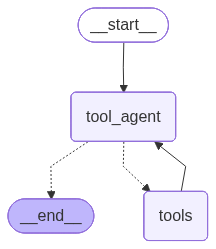

In [82]:
from langgraph.graph import StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image

def tool_agent(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_agent", tool_agent)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_agent")
builder.add_conditional_edges("tool_agent", tools_condition)
builder.add_edge("tools", "tool_agent")

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [85]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news from August 23-2025, after that same something about Attention is all you need paper, add 9 plus 5 and then multiply by 100")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news from August 23-2025, after that same something about Attention is all you need paper, add 9 plus 5 and then multiply by 100
================================== Ai Message ==================================
Tool Calls:
  tavily_search (de98sd4bb)
 Call ID: de98sd4bb
  Args:
    __arg1: top 10 AI news August 23 2025
  wiki_search (j1wjtx5da)
 Call ID: j1wjtx5da
  Args:
    __arg1: Attention is all you need paper
  add (w3ay1yxd3)
 Call ID: w3ay1yxd3
  Args:
    __arg1: 9, 5
  multiply (j7n0djdpb)
 Call ID: j7n0djdpb
  Args:
    __arg1: 14, 100
================================= Tool Message =================================
Name: tavily_search

{"query": "top 10 AI news August 23 2025", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.goodgoodgood.co/articles/good-news-this-week-august-23-2025", "title": "Good News This Week: Augu